<a href="https://colab.research.google.com/github/wlsisl/ESAA_/blob/main/ch8_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 ch8. 텍스트 분석

[ 용어 ]

* 텍스트 분류 : Text Categorization이라고 한다. 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법을 통칭합니다. 

* 감성 분석 : 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법을 총칭한다. 소셜 미디어 감정 분석, 영화나 제품에 대한 긍정 또는 리뷰 여론조사 의견 분석 등의 다양한 영역에서 활용된다. 

* 텍스트 요약 : 텍스트 내에서 중요한 주제나 주심 사상을 추출하는 기법을 말한다. 대표적으로 토픽 모델링 있다. 

* 텍스트 군집화와 유사도 측정 : 비슷한 유형의 문서에 대해 군집화를 수행하는 기법을 말한다. 

## 01. 텍스트 분석 이해

-  텍스트 분석은 비정형 데이터인 텍스트를 분석한다. 

**피처 벡터화 또는 피처 추출** : 텍스트를 word 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현되는 것. 

 방법 1) BOW ( bag of words)

 방법 2) Word2Vec 

## <텍스트 분석 수행 프로세스>
1. 텍스트 사전 준비작업 : 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어 등의 토큰화 작업, 의미 없는 단어 제거 작업, 어근 추출 등의 텍스트 정규화 작업을 수행하는 것을 통칭

2. 피처 벡터화/추출 ; 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당한다. bo2는 대표적으로 count기반과 tf-idf기반 벡터화가 있다.

3. ml모델 수립 및 학습/예측/평가 : 피처 벡터화된 데이터 세트에 ML모델을 적용해 학습/예측 및 평가를 수행한다.

## <파이썬 기반의 NLP>

* NLTK : 파이썬의 가장 대표적인 NLP 패키지. 

* Gensim: 토픽 모델링 분야에서 가장 두각을 나타내는 피키지

* SpaCy : 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지

## 02. 텍스트 사전 준비 작업( 텍스트 전처리 )

텍스트 자체를 바로 피처로 만들 수 없기 때문에 사전에 텍스트를 가공하는 준비 작업이 필요하다. 

* 클렌징
* 토큰화
* 필터링/ 스톱워드 제거 / 철자 수정
* Stemming
* Lemmatization


### **클렌징** 

 텍스트에서 분석에 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업이다. 

 ex) HTML, XML 태그나 특정 기호 등을 사전에 제거한다.

### **토큰화**

 토큰화의 유형은 문서에서 문장을 분리하는 문장 토큰화와 문장에서 다너를 토큰으로 분리하는 단어 토큰화로 나눌 수 있다. 

 1) **문장 토큰화**는 문장의 마침표, 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적이다. 

다음은 sent_tokenize를 이용해 토큰화를 수행하자. 텍스트 문서를 문장으로 각각 분리하는 예제이다. 


In [7]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \nYou can see it out your window or on your television. \nYou feel it when you go to work, or go to church or pay your taxes.'
sentences=sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-> 반환된 list객체가 3개의 문장으로 된 문자열을 가지고 있다.

2) **단어 토큰화**는 문장을 단어로 토큰화하는 것이다. 기본적으로 공백, 콤마, 마침표, 개행 문자 등으로 단어를 분리하지만 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행한다.


In [8]:
from nltk import word_tokenize

sentence='The Matrix is everywhere its all around us, here even in this room.'
words=word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


3) 두 개를 조합하여 문서에 대해서 모든 단어를 토큰화해보자. 

3개의 문장으로 된 text_sample을 문장별로 단어 토큰화를 적용한다.

In [9]:
# 문서를 먼저 문장으로 나누고 개별 문장을 다시 단어로 토큰화하는 함수 생성

from nltk import word_tokenize, sent_tokenize

#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
  #문장별로 분리 토큰
  sentences = sent_tokenize(text)
  #분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

#여러 문장에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


3개 문장을 문장별로 먼저 토큰화했으므로 word_tokens 변수는 3개의 리스트 객체를 내포하는 리스트이다. 문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시될 수 밖에 없다. 이 문제를 해결하기 위해 **n-gram**이 도입

## <스톱 워드 제거>

스톱워드는 분석에 큰 의미가 없는 단어를 지칭한다.

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [12]:
#실행

import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens =  []

#위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  #개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
     #소문자로 모두 변환
     word= word.lower()
     #토큰화된 개별 단어가 스톱워드의 단어에 포함되지 앟으면 word_tokens에 추가
     if word not in stopwords:
       filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


##<Stemming과 Lemmatization>

문법적인 요소에 따라 단어가 다양하게 변한다. 두 기능 모두 원형 단어를 찾는다는 목적이 있다. lemmatization이 더 정교하다. 

In [13]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


work의 경우 진행형, 3인칭 단수, 과거형 모두 기본 단어인 work에 ing, s, ed가 붙는 단순한 변화이므로 원형 단어로 work를 제대로 인식한다. 

하지만 amuse의 경우, 각 변화가 amuse가 아닌 amus에 ing, s, ed가 붙으므로 정확한 단어인 amuse가 아닌 amus를 원형 단어로 인식한다. 

형용사인 happy, fancy의 경우도 비교형, 최상급형으로 변형된 단어의 정확한 원형을 찾지 못하고 원형 단어에서 철자가 다른 어근 단어로 인식하는 경우가 발생

In [14]:
#Lemmatization을 수행
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

amuse amuse amuse
happy happy
fancy fancy


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 03. Bag of Words = BOW

문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 비해 빈도 값을 부여해 피처 값을 추출하는 모델이다. 

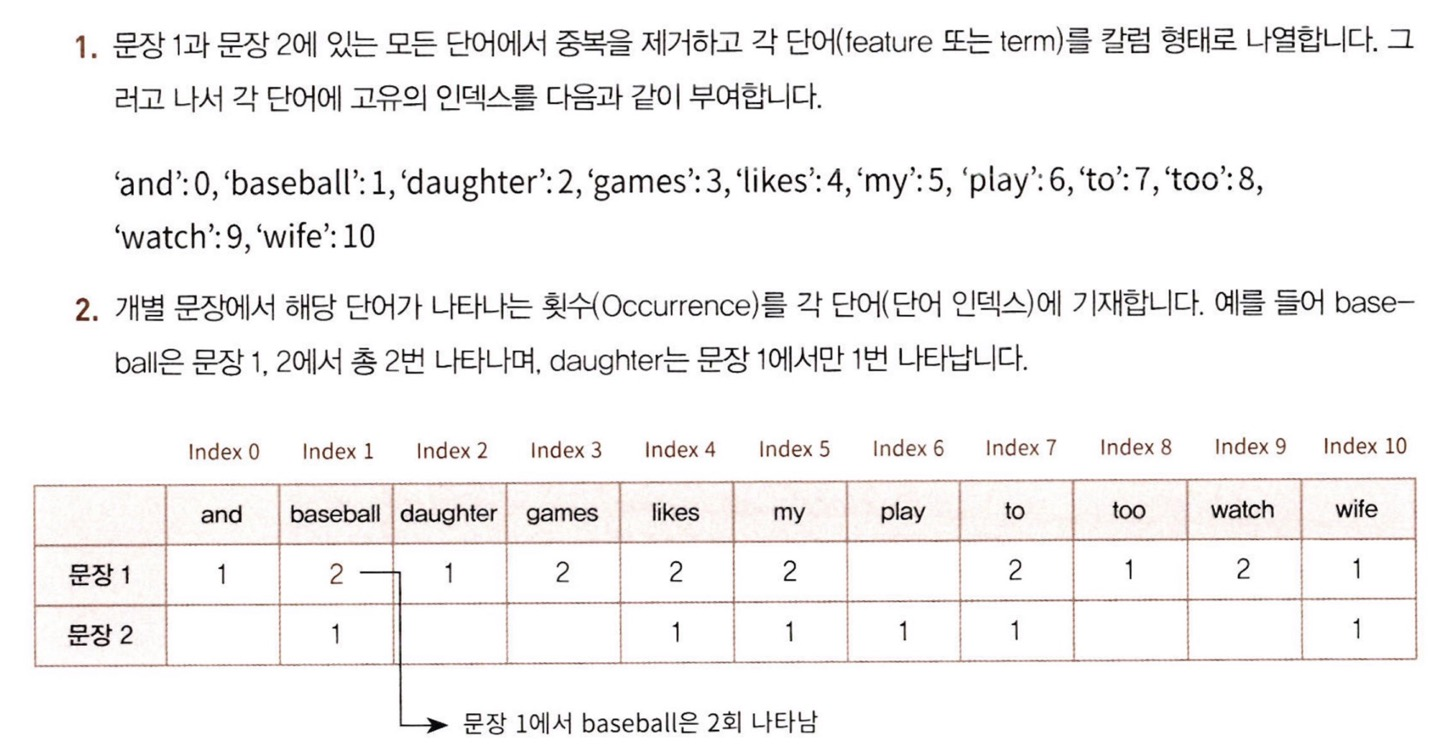

대표적인 단점 

* 문맥 의미 반영 부족 

bow는 단어의 순서를 고려하지 않기 때문에 문장 내에서 단어의 문맥적인 의미가 무시된다. 

* 희소 행렬 문제

bow로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉽다. 하나의 문서에 있는 단어는 이 중 극히 일부분이므로 대부분 데이터는 0ㄱ값으로 채워지게 된다. 

 희소행렬 ) 대규모 칼럼으로 구성된 행렬에서 대부분 값이 0으로 채워지는 행렬

 밀집 행렬 ) 대부분 0이 아닌 의미있는 값으로 채워져 있는 행렬

##<피처 벡터화>
: 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환하는 것

 이유)  머신러닝 알고리즘은 일반적으로 숫자형 피처를 데이터로 입력받아 동작하기 때문에 텍스트와 같은 데이터는 머신러닝 알고리즘에 바로 입력할 수가 없다. 
  
  BOW 모델에서 피처 벡터화를 수행한다는 것은 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 분여하는 데이터 세트 모델로 변경하는 것이다. 

  * 카운트 벡터화 : 해당 단어가 나타나는 횟수를 피처 값으로 부여하는 것.
  * TF-IDF 벡터화 : 핵심 키워드가 아닌 문장 특성상 자주 사용하는 것은 걸러주는
  
##<사이킷런의 count 및 TF-IDF 벡터화 구현 : countvectorizer, TfidfVectorizer>

1) countvectorizer : 카운트 기반의 벡터화를 구현한 클래스 

 * 소문자 일괄 변환, 토큰화, 스톱워드 필터링 등 텍스트 전처리도 함께 수행함.

 * 파라미터
     
     1. max_df : 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처를 제외
     2. min_df : 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처 제외
     3. max_features: 추출하는 피처의 개수를 제한하며 정수로 값 지정
     4. stop_words : english로 지정하면 영어의 스톱워드로 지정된 단어는 추출에서 제외
     5. n_gram_range: bow모델의 단어 순서를 보강하기 위한 n_gram 범위 설정
     6.analyaer: 피처 추출을 수행한 단위를 지정. 디폴트는 word
     7. token_pattern: 토큰화를 수행하는 정규 표현식 패턴을 지정. 디폴트는 \b\w\w+\b 
     8. tokenizer: 토큰화를 별도의 커스텀 함수로 이용시 적용

순서 ; 영어의 경우 모든 문자를 소문자로 변경 -> 디폴트로 단어 기준으로 n_gram_range를 반영해 각 단어 토큰화 -> 텍스트 정규화 수행 -> 토큰화된 단어를 피처로 추출하고 단어 빈도수 벡터 값을 적용 

##<BOW 벡터화를 위한 희소 행렬>
피처 벡터화하는 방법은 많은 피처 칼럼을 만들 수 밖에 없다. 이처럼 대규모 행렬의 대부분에 0값이 채워지면서 메모리 공간이 무의미하게 
스이고 있다. 이러한 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환해야한다. 그 두가지 방법은 COO, CSR형식이다.

##<희소 행렬 - COO 형식>

: 0이 아닌 데이터만 별도의 데이터 배열에 저장하고 그 데이터가 가리키는 행과 열의 위치를 별도읩 ㅐ열로 저장하는 방식이다. 

**sparse이용**

In [16]:
import numpy as np

dense= np.array([[3,0,1],[0,2,0]])

In [17]:
from scipy import sparse
#0이 아닌 데이터 추출
data= np.array([3,1,2])

#행 위치와 열 위치를 각각 백열로 생성

row_pos = np.array([0,0,1])
col_pos= np.array([0,2,1])

#sparse 패키지의 coo_matrix를 이용해 COO형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))  #희소행렬 객체 변수 sparse_coo

In [18]:
#다시 밀집 형태의 행렬로 추출
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

##<희소 행렬 - CSR 형식>

COO형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야하는 문제점을 해결한 방식


**csr_matirx 클래스 이용**

In [19]:
from scipy import sparse

dense2=np.array([[0,0,1,0,0,5],
                 [1,4,0,3,2,5],
                 [0,6,0,3,0,0],
                 [2,0,0,0,0,0],
                 [0,0,0,7,0,8],
                 [1,0,0,0,0,0]])

#0이 아닌 데이터 추출
data2=np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

#행 위치와 열 위치를 각각 array로 생성
row_pos=np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos=np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

#COO 형식으로 변환
sparse_coo=sparse.coo_matrix((data2, (row_pos, col_pos)))

#행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성 + 맨 끝에는 총 데이터 수
row_pos_ind=np.array([0,2,7,9,10,12,13])

#CSR 형식으로 변환
sparse_csr=sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [20]:
#밀집 행렬을 생성 파라미터로 입력하면 coo나 csr희소 행렬로 생성한다. 

dense3=np.array([[0,0,1,0,0,5],
                 [1,4,0,3,2,5],
                 [0,6,0,3,0,0],
                 [2,0,0,0,0,0],
                 [0,0,0,7,0,8],
                 [1,0,0,0,0,0]])

coo=sparse.coo_matrix(dense3)
csr=sparse.csr_matrix(dense3)

In [21]:
coo

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in COOrdinate format>

In [23]:
csr

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>